**NEURAL NETWORK BASED INTRUSION DETECTION SYSTEM (IDS) FOR INTERNERT OF VEHICLES (IOV)**

In [33]:
import pandas as pd
pd.set_option('display.max_columns', 100)

In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_recall_fscore_support
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from xgboost import plot_importance

The CICIDS2017 dataset is available at: https://www.unb.ca/cic/datasets/ids-2017.html


Sampled subsets of CICIDS2017 is used due to the large size of this dataset.

In [35]:
df=pd.read_csv('/content/CICIDS2017_sample.csv')
df.head()

,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,4,2,0,37,0,31,6,18.500000,17.677670,0,0,0.000000,0.000000,9.250000e+06,500000.000000,4.000000,0.000000,4,4,4,4.000000,0.000000,4,4,0,0.000000,0.000000,0,0,1,0,0,0,40,0,500000.000000,0.000000,6,31,22.666667,14.433757,2.083333e+02,0,1,0,0,1,0,0,0,0,34.000000,18.500000,0.000000,40,0,0,0,0,0,0,2,37,0,0,60,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,142377,46,62,1325,105855,570,0,28.804348,111.407285,4344,0,1707.338710,846.172655,7.527901e+05,758.549485,1330.626168,5048.982697,23198,0,142377,3163.933333,7552.916858,23792,0,119204,1954.163934,6058.842404,23865,4,0,0,0,0,1168,1992,323.085892,435.463593,0,4344,983.302752,1052.392050,1.107529e+06,0,0,0,1,0,0,0,0,1,992.407407,28.804348,1707.338710,1168,0,0,0,0,0,0,46,1325,62,105855,29200,61,30,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,118873,23,28,1169,45025,570,0,50.826087,156.137367,2896,0,1608.035714,902.027366,3.885996e+05,429.029300,2377.460000,6838.420713,23435,3,118873,5403.318182,9768.511157,24311,49,95541,3538.555556,8193.060024,24168,3,0,0,0,0,744,904,193.483802,235.545498,0,2896,888.346154,1028.323762,1.057450e+06,0,0,0,1,0,0,0,0,1,905.764706,50.826087,1608.035714,744,0,0,0,0,0,0,23,1169,28,45025,29200,61,4,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,143577,43,55,1301,107289,570,0,30.255814,115.178969,4344,0,1950.709091,928.230389,7.563189e+05,682.560577,1480.175258,5316.455522,23220,2,143530,3417.380952,7846.824009,23823,2,120357,2228.833333,6441.592862,23889,2,0,0,0,0,1120,1768,299.490865,383.069712,0,4344,1096.868687,1183.665309,1.401064e+06,0,0,0,1,0,0,0,0,1,1108.061224,30.255814,1950.709091,1120,0,0,0,0,0,0,43,1301,55,107289,29200,61,26,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,143745,49,59,1331,110185,570,0,27.163265,108.067176,4344,0,1867.542373,928.861935,7.757905e+05,751.330481,1343.411215,5112.820617,24181,2,143726,2994.291667,7449.818687,24248,2,120164,2071.793103,6233.858327,24616,2,0,0,0,0,1252,1896,340.881422,410.449059,0,4344,1023.082569,1147.958350,1.317808e+06,0,0,0,1,0,0,0,0,1,1032.555556,27.163265,1867.542373,1252,0,0,0,0,0,0,49,1331,59,110185,29200,61,31,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [3]:
df.shape

(56661, 78)

In [4]:
print(df.columns)

Index(['Flow Duration', 'Total Fwd Packets', 'Total Backward Packets',
       'Total Length of Fwd Packets', 'Total Length of Bwd Packets',
       'Fwd Packet Length Max', 'Fwd Packet Length Min',
       'Fwd Packet Length Mean', 'Fwd Packet Length Std',
       'Bwd Packet Length Max', 'Bwd Packet Length Min',
       'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
       'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags',
       'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
       'SYN Flag Count', 'RST Flag Count', 'PS

In [36]:
print(df['Label'].value_counts())

Label
BENIGN          22731
DoS             19035
PortScan         7946
BruteForce       2767
WebAttack        2180
Bot              1966
Infiltration       36
Name: count, dtype: int64


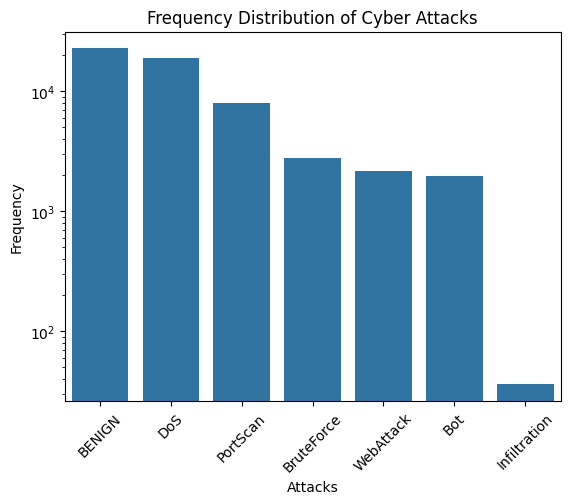

In [37]:
# Use barplot for categorical frequency
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(x=df['Label'].value_counts().index, y=df['Label'].value_counts().values, log=True)

plt.xlabel('Attacks')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Cyber Attacks')
plt.xticks(rotation=45)  # Rotate x-axis labels if necessary
plt.show()


In [8]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_colwidth', None)

In [9]:
df.isnull().sum()

,0
Flow Duration,0
Total Fwd Packets,0
Total Backward Packets,0
Total Length of Fwd Packets,0
Total Length of Bwd Packets,0
Fwd Packet Length Max,0
Fwd Packet Length Min,0
Fwd Packet Length Mean,0
Fwd Packet Length Std,0
Bwd Packet Length Max,0


In [38]:
# Missing value analysis

def missing_val_analysis(df,missing_value):

    total_missing = df.isin([missing_value]).sum().sum()
    total_dfsize = df.size
    percentage_missing = (total_missing / total_dfsize) * 100

    # Print the results
    print(f"Total size of the DataFrame (total number of elements): {total_dfsize}")
    print(f"Total number of missing values: {total_missing}")
    print(f"Percentage of missing values: {percentage_missing:.10f}%")

    return total_dfsize, total_missing, percentage_missing

missing_val_analysis(df, np.NAN)

Total size of the DataFrame (total number of elements): 4419558
Total number of missing values: 54
Percentage of missing values: 0.0012218416%


(4419558, 54, 0.0012218416411776925)

In [39]:
# Min-max normalization and imputing missing values with 0
numeric_features = df.dtypes[df.dtypes != 'object'].index
df[numeric_features] = df[numeric_features].apply(
    lambda x: (x - x.min()) / (x.max()-x.min()))

df = df.fillna(0)

In [14]:
df.head()


,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,3.333333e-08,0.000144,0.000000,0.000013,0.000000,0.001327,0.003026,0.003114,0.002508,0.000000,0.0,0.000000,0.000000,0.0,0.0,3.361345e-08,0.000000,3.361345e-08,5.042017e-08,3.333333e-08,3.361345e-08,0.000000,3.361345e-08,4.201681e-08,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.0,0.0,0.0,0.0,0.000262,0.000000,0.166667,0.000000,0.004525,0.001327,0.010979,0.003065,0.000009,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.015901,0.003114,0.000000,0.000262,0.0,0.0,0.0,0.0,0.0,0.0,0.000144,0.000013,0.000000,0.000000,0.000931,0.000000,0.000167,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
1,1.186475e-03,0.006494,0.006277,0.000462,0.004923,0.024401,0.000000,0.004849,0.015804,0.373453,0.0,0.441287,0.126401,0.0,0.0,1.118173e-05,0.000062,1.949412e-04,1.680672e-08,1.186475e-03,2.658768e-05,0.000091,1.999328e-04,8.403361e-09,0.000993,0.000016,0.000078,0.000201,3.361345e-08,0.0,0.0,0.0,0.0,0.007637,0.010083,0.000108,0.000218,0.000000,0.185959,0.476279,0.223486,0.049889,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.142857,0.464114,0.004849,0.441287,0.007637,0.0,0.0,0.0,0.0,0.0,0.0,0.006494,0.000462,0.006277,0.004931,0.445572,0.000946,0.005005,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
2,9.906083e-04,0.003175,0.002835,0.000408,0.002094,0.024401,0.000000,0.008555,0.022149,0.248968,0.0,0.415620,0.134744,0.0,0.0,1.997866e-05,0.000083,1.969328e-04,4.201681e-08,9.906083e-04,4.540604e-05,0.000117,2.042941e-04,4.201681e-07,0.000796,0.000030,0.000105,0.000203,2.521008e-08,0.0,0.0,0.0,0.0,0.004865,0.004576,0.000064,0.000118,0.000000,0.123973,0.430285,0.218375,0.047633,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.142857,0.423594,0.008555,0.415620,0.004865,0.0,0.0,0.0,0.0,0.0,0.0,0.003175,0.000408,0.002835,0.002098,0.445572,0.000946,0.000667,0.533333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
3,1.196475e-03,0.006061,0.005568,0.000454,0.004990,0.024401,0.000000,0.005093,0.016339,0.373453,0.0,0.504189,0.138658,0.0,0.0,1.243845e-05,0.000065,1.951261e-04,3.361344e-08,1.196083e-03,2.871749e-05,0.000094,2.001933e-04,2.521008e-08,0.001003,0.000019,0.000083,0.000201,1.680672e-08,0.0,0.0,0.0,0.0,0.007323,0.008950,0.000100,0.000192,0.000000,0.185959,0.531287,0.251363,0.063111,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.142857,0.518201,0.005093,0.504189,0.007323,0.0,0.0,0.0,0.0,0.0,0.0,0.006061,0.000454,0.005568,0.004998,0.445572,0.000946,0.004338,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
4,1.197875e-03,0.006927,0.005973,0.000464,0.005125,0.024401,0.000000,0.004572,0.015330,0.373453,0.0,0.482694,0.138753,0.0,0.0,1.128917e-05,0.000062,2.032017e-04,3.361344e-08,1.197717e-03,2.516211e-05,0.000089,2.037647e-04,2.521008e-08,0.001001,0.000017,0.000080,0.000207,1.680672e-08,0.0,0.0,0.0,0.0,0.008186,0.009597,0.000114,0.00020

In [40]:
# verifying our missing data handling
def missing_val_analysis(df,missing_value):

    total_missing = df.isin([missing_value]).sum().sum()
    total_dfsize = df.size
    percentage_missing = (total_missing / total_dfsize) * 100

    # Print the results
    print(f"Total size of the DataFrame (total number of elements): {total_dfsize}")
    print(f"Total number of missing values: {total_missing}")
    print(f"Percentage of missing values: {percentage_missing:.10f}%")

    return total_dfsize, total_missing, percentage_missing

missing_val_analysis(df, np.NAN)

Total size of the DataFrame (total number of elements): 4419558
Total number of missing values: 0
Percentage of missing values: 0.0000000000%


(4419558, 0, 0.0)

In [16]:
labels_column=df['Label']
print(labels_column.unique())

['BENIGN' 'DoS' 'PortScan' 'Bot' 'Infiltration' 'WebAttack' 'BruteForce']


In [41]:
# label encoding to handle the categorical labels
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

labelencoder = LabelEncoder()
df.iloc[:, -1] = labelencoder.fit_transform(df.iloc[:, -1])
X = df.drop(['Label'],axis=1).values
y = df.iloc[:, -1].values.reshape(-1,1)
y=np.ravel(y)
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.8, test_size = 0.2, random_state = 0,stratify = y)

In [42]:
from sklearn.preprocessing import LabelEncoder

# Assuming your DataFrame is named 'df' and the target column is 'label'
labels = ['BENIGN', 'DoS', 'PortScan', 'Bot', 'Infiltration', 'WebAttack', 'BruteForce']
df = pd.DataFrame({'label': labels})

# Perform Label Encoding
label_encoder = LabelEncoder()
df['label_encoded'] = label_encoder.fit_transform(df['label'])

# Print the mapping of labels to encodings
class_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label to Encoding Mapping:")
for label, encoding in class_mapping.items():
    print(f"{label}: {encoding}")

# Display the DataFrame
print("\nEncoded DataFrame:")
print(df)


Label to Encoding Mapping:
BENIGN: 0
Bot: 1
BruteForce: 2
DoS: 3
Infiltration: 4
PortScan: 5
WebAttack: 6

Encoded DataFrame:
          label  label_encoded
0        BENIGN              0
1           DoS              3
2      PortScan              5
3           Bot              1
4  Infiltration              4
5     WebAttack              6
6    BruteForce              2


In [20]:
labels_column.value_counts()

,count
Label,
0,22731
3,19035
5,7946
2,2767
6,2180
1,1966
4,36


The imbalance in the data is handled in the modle training below, using diffrent approaches, such as: SMOTE, assigning class weights, etc.

In [43]:
pip install tensorflow

# Neural Network Model 1:

FEATURES:
- **Architecture:**
  - 128-64-32 Dense layers
  - Batch Normalization
  - Dropout (0.3)
- **Activation Function:** ReLU
- **Optimizer:** Adam
- **Learning Rate Adjustments:** None
- **Handling Imbalance:** Class weights
- **Special Features:** None
- **Validation Accuracy:** 89.21%



In [52]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np

# Assume `X` is your input features and `y` is your labels
# Preprocess data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert labels to one-hot encoding
y_onehot = to_categorical(y)

# Train-test split
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y_onehot, test_size=0.15, random_state=42, stratify=y)

# Build the model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),

    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(y_train.shape[1], activation='softmax')  # Output layer for multi-class classification
])

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=256,
    class_weight={0: 1.0, 1: 5.0, 2: 10.0, 3: 30.0, 4: 100.0, 5: 200.0, 6: 500.0},  # Adjust weights based on your class distribution
    verbose=2
)

# Evaluate
loss, accuracy = model.evaluate(X_val, y_val)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")

# Predict on validation set
y_pred = model.predict(X_val)

# Convert predictions from one-hot encoded format to class labels
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_val, axis=1)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_true_classes, y_pred_classes))


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


189/189 - 8s - 45ms/step - accuracy: 0.5590 - loss: 18.9000 - val_accuracy: 0.6933 - val_loss: 1.0719
Epoch 2/50
189/189 - 5s - 26ms/step - accuracy: 0.6553 - loss: 7.0408 - val_accuracy: 0.7038 - val_loss: 1.0624
Epoch 3/50
189/189 - 1s - 4ms/step - accuracy: 0.6913 - loss: 5.5669 - val_accuracy: 0.7471 - val_loss: 0.9708
Epoch 4/50
189/189 - 1s - 4ms/step - accuracy: 0.7179 - loss: 4.6435 - val_accuracy: 0.7627 - val_loss: 0.9758
Epoch 5/50
189/189 - 1s - 7ms/step - accuracy: 0.7390 - loss: 4.2778 - val_accuracy: 0.7751 - val_loss: 0.9657
Epoch 6/50
189/189 - 1s - 5ms/step - accuracy: 0.7542 - loss: 3.8886 - val_accuracy: 0.8024 - val_loss: 0.8323
Epoch 7/50
189/189 - 0s - 2ms/step - accuracy: 0.7667 - loss: 3.5811 - val_accuracy: 0.8041 - val_loss: 0.8098
Epoch 8/50
189/189 - 1s - 3ms/step - accuracy: 0.7765 - loss: 3.2406 - val_accuracy: 0.8089 - val_loss: 0.7657
Epoch 9/50
189/189 - 0s - 2ms/step - accuracy: 0.7895 - loss: 2.9980 - val_accuracy: 0.8181 - val_loss: 0.6756
Epoch 10/

**Model 2:**
- **Architecture:**
  - 256-128-64-32 Dense layers
  - LeakyReLU activation
  - Batch Normalization
  - Dropout (0.4, 0.3, 0.2)
- **Activation Function:** LeakyReLU
- **Optimizer:** AdamW (with weight decay)
- **Learning Rate Adjustments:** ReduceLROnPlateau, EarlyStopping
- **Handling Imbalance:** SMOTE (balanced data before training), oversampled specific classes
- **Special Features:**
  - SMOTE oversampling
  - Callback optimizations
- **Validation Accuracy:** 95.36%



In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, LeakyReLU
from tensorflow.keras.optimizers import AdamW
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import numpy as np

# Preprocess data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert labels to one-hot encoding
y_onehot = to_categorical(y)

# Train-test split
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y_onehot, test_size=0.15, random_state=42, stratify=y)

# Handle imbalance with SMOTE (applied to training data only)
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, np.argmax(y_train, axis=1))
y_train_resampled = to_categorical(y_train_resampled)

# Build the model
model = Sequential([
    Dense(256, input_shape=(X_train_resampled.shape[1],)),
    LeakyReLU(alpha=0.1),
    BatchNormalization(),
    Dropout(0.4),

    Dense(128),
    LeakyReLU(alpha=0.1),
    BatchNormalization(),
    Dropout(0.3),

    Dense(64),
    LeakyReLU(alpha=0.1),
    BatchNormalization(),
    Dropout(0.3),

    Dense(32),
    LeakyReLU(alpha=0.1),
    BatchNormalization(),
    Dropout(0.2),

    Dense(y_train_resampled.shape[1], activation='softmax')  # Output layer for multi-class classification
])

# Compile the model with AdamW optimizer
model.compile(
    optimizer=AdamW(learning_rate=0.001, weight_decay=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Callbacks for learning rate adjustment and early stopping
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6, verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)

# Train the model
history = model.fit(
    X_train_resampled, y_train_resampled,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=256,
    class_weight=None,  # No need for class_weight since SMOTE balances the data
    callbacks=[reduce_lr, early_stopping],
    verbose=2
)
# Oversample training data, focusing on Class 4
smote = SMOTE(sampling_strategy={4: 20000}, random_state=42)  # Increase samples for Class 4
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_resampled, np.argmax(y_train_resampled, axis=1))
y_train_balanced = to_categorical(y_train_balanced)

# # Retrain the model
# history = model.fit(
#     X_train_balanced, y_train_balanced,
#     validation_data=(X_val, y_val),
#     epochs=50,
#     batch_size=256,
#     callbacks=[reduce_lr, early_stopping],
#     verbose=2
# )


# Evaluate the model
loss, accuracy = model.evaluate(X_val, y_val, verbose=0)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")

# Generate evaluation metrics
y_val_pred = model.predict(X_val)
y_val_pred_labels = np.argmax(y_val_pred, axis=1)
y_val_true_labels = np.argmax(y_val, axis=1)

print("\nClassification Report:")
print(classification_report(y_val_true_labels, y_val_pred_labels))

print("\nConfusion Matrix:")
print(confusion_matrix(y_val_true_labels, y_val_pred_labels))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 1/50
529/529 - 11s - 20ms/step - accuracy: 0.8758 - loss: 0.4131 - val_accuracy: 0.8855 - val_loss: 0.3493 - learning_rate: 0.0010
Epoch 2/50
529/529 - 3s - 6ms/step - accuracy: 0.9406 - loss: 0.2008 - val_accuracy: 0.9160 - val_loss: 0.2767 - learning_rate: 0.0010
Epoch 3/50
529/529 - 1s - 2ms/step - accuracy: 0.9481 - loss: 0.1723 - val_accuracy: 0.9092 - val_loss: 0.2730 - learning_rate: 0.0010
Epoch 4/50
529/529 - 1s - 2ms/step - accuracy: 0.9515 - loss: 0.1587 - val_accuracy: 0.9188 - val_loss: 0.2514 - learning_rate: 0.0010
Epoch 5/50
529/529 - 1s - 2ms/step - accuracy: 0.9545 - loss: 0.1476 - val_accuracy: 0.9234 - val_loss: 0.2395 - learning_rate: 0.0010
Epoch 6/50
529/529 - 1s - 2ms/step - accuracy: 0.9550 - loss: 0.1446 - val_accuracy: 0.9147 - val_loss: 0.2369 - learning_rate: 0.0010
Epoch 7/50
529/529 - 1s - 2ms/step - accuracy: 0.9573 - loss: 0.1372 - val_accuracy: 0.9229 - val_loss: 0.2193 - learning_rate: 0.0010
Epoch 8/50
529/529 - 2s - 3ms/step - accuracy: 0.9589

**Model 3:**
- **Architecture:**
  - 256-128-64 Dense layers
  - Batch Normalization
  - Dropout (0.3)
- **Activation Function:** ReLU
- **Optimizer:** Adam
- **Learning Rate Adjustments:** ReduceLROnPlateau, EarlyStopping
- **Handling Imbalance:** SMOTE (balanced data before training)
- **Special Features:** SMOTE oversampling
- **Validation Accuracy:** 97.0%

In [49]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Assume `X` is your input features and `y` is your labels

# Step 1: Preprocess Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert labels to one-hot encoding
y_onehot = to_categorical(y)

# Train-test split
X_train, X_val, y_train, y_val = train_test_split(
    X_scaled, y_onehot, test_size=0.15, random_state=42, stratify=y
)

# Convert back to integer labels for SMOTE
y_train_labels = np.argmax(y_train, axis=1)

# Step 2: Handle Class Imbalance Using SMOTE
smote = SMOTE(sampling_strategy={4: 50}, random_state=42)  # Oversample Class 4
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train_labels)

# Convert back to one-hot encoding after resampling
y_train_resampled = to_categorical(y_train_resampled)

# Step 3: Define Callbacks
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss', factor=0.5, patience=3, verbose=1, min_lr=1e-6
)
early_stopping = EarlyStopping(
    monitor='val_loss', patience=10, verbose=1, restore_best_weights=True
)

# Step 4: Build the Model
model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train_resampled.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),

    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(y_train_resampled.shape[1], activation='softmax')  # Output layer for multi-class classification
])

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Step 5: Train the Model
history = model.fit(
    X_train_resampled, y_train_resampled,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=256,
    class_weight=None,  # SMOTE has already balanced the classes
    callbacks=[reduce_lr, early_stopping],
    verbose=2
)

# Step 6: Evaluate the Model
loss, accuracy = model.evaluate(X_val, y_val)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")

# Step 7: Generate Classification Report and Confusion Matrix
y_val_pred = model.predict(X_val)
y_val_pred_labels = np.argmax(y_val_pred, axis=1)
y_val_true_labels = np.argmax(y_val, axis=1)

print("Classification Report:")
print(classification_report(y_val_true_labels, y_val_pred_labels))

print("Confusion Matrix:")
print(confusion_matrix(y_val_true_labels, y_val_pred_labels))


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


189/189 - 11s - 56ms/step - accuracy: 0.8267 - loss: 0.5485 - val_accuracy: 0.9192 - val_loss: 0.3018 - learning_rate: 0.0010
Epoch 2/50
189/189 - 2s - 10ms/step - accuracy: 0.9017 - loss: 0.2851 - val_accuracy: 0.9308 - val_loss: 0.1894 - learning_rate: 0.0010
Epoch 3/50
189/189 - 0s - 2ms/step - accuracy: 0.9143 - loss: 0.2417 - val_accuracy: 0.9360 - val_loss: 0.1642 - learning_rate: 0.0010
Epoch 4/50
189/189 - 1s - 3ms/step - accuracy: 0.9238 - loss: 0.2110 - val_accuracy: 0.9354 - val_loss: 0.1535 - learning_rate: 0.0010
Epoch 5/50
189/189 - 1s - 3ms/step - accuracy: 0.9289 - loss: 0.1915 - val_accuracy: 0.9459 - val_loss: 0.1373 - learning_rate: 0.0010
Epoch 6/50
189/189 - 1s - 3ms/step - accuracy: 0.9346 - loss: 0.1731 - val_accuracy: 0.9515 - val_loss: 0.1254 - learning_rate: 0.0010
Epoch 7/50
189/189 - 1s - 4ms/step - accuracy: 0.9368 - loss: 0.1653 - val_accuracy: 0.9496 - val_loss: 0.1173 - learning_rate: 0.0010
Epoch 8/50
189/189 - 1s - 7ms/step - accuracy: 0.9419 - loss: 0

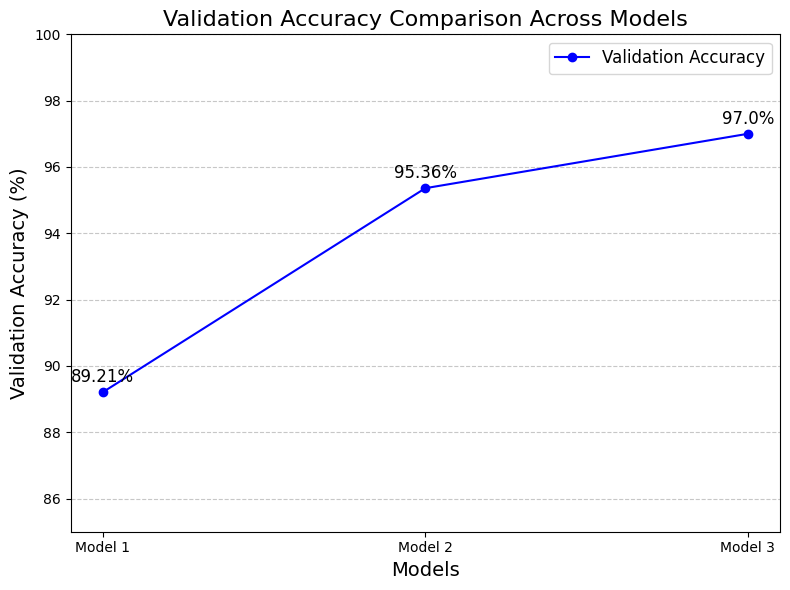

In [54]:
import matplotlib.pyplot as plt

# Data
models = ["Model 1", "Model 2", "Model 3"]
accuracies = [89.21, 95.36, 97.00]

# Create the line chart
plt.figure(figsize=(8, 6))
plt.plot(models, accuracies, marker='o', linestyle='-', color='b', label='Validation Accuracy')

# Add titles and labels
plt.title("Validation Accuracy Comparison Across Models", fontsize=16)
plt.xlabel("Models", fontsize=14)
plt.ylabel("Validation Accuracy (%)", fontsize=14)
plt.ylim(85, 100)  # Set y-axis range to focus on performance differences
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(fontsize=12)

# Annotate data points
for i, acc in enumerate(accuracies):
    plt.text(models[i], acc + 0.3, f"{acc}%", ha='center', fontsize=12)

# Show the chart
plt.tight_layout()
plt.show()
